In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
image = cv2.imread("/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg",-1)

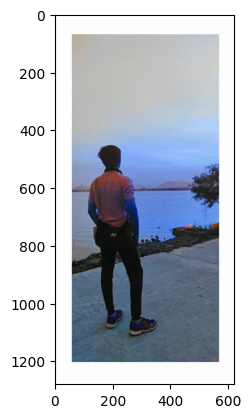

In [ ]:
plt.imshow(image)

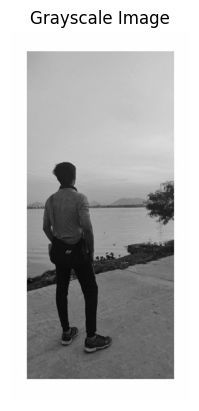

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


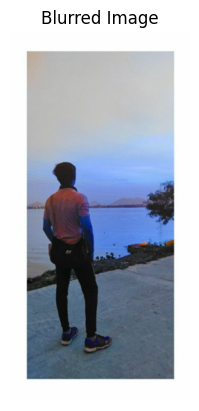

In [ ]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')
plt.show()


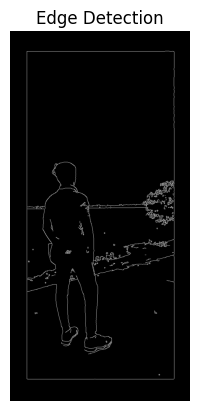

In [ ]:
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()


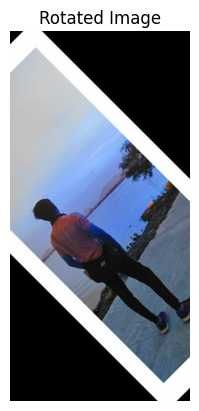

In [ ]:
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1) # 45 degrees rotation
rotated_image = cv2.warpAffine(image, M, (cols, rows))
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')
plt.show()


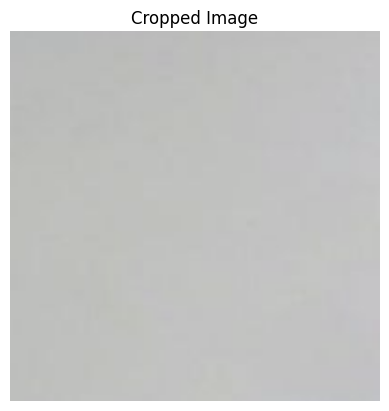

In [ ]:
cropped_image = image[100:300, 200:400]  # Define the region to crop
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')
plt.show()


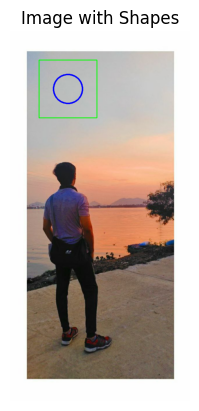

In [ ]:
image_copy = image.copy()
cv2.rectangle(image_copy, (100, 100), (300, 300), (0, 255, 0), 2)  # Draw rectangle
cv2.circle(image_copy, (200, 200), 50, (255, 0, 0), 3)  # Draw circle
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title('Image with Shapes')
plt.axis('off')
plt.show()


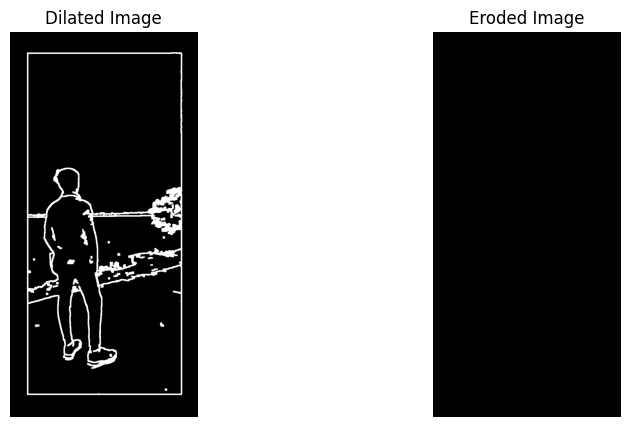

In [ ]:
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(edges, kernel, iterations=1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image'), plt.axis('off')
plt.show()


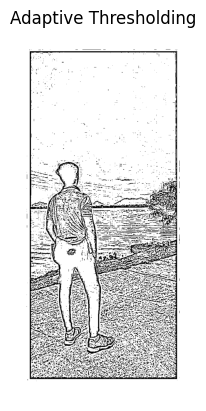

In [ ]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()



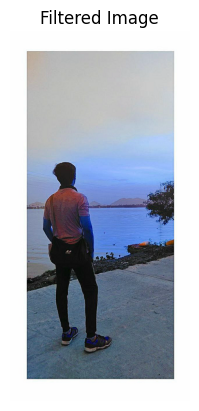

In [ ]:
# Apply a custom kernel for image filtering
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
filtered_image = cv2.filter2D(image, -1, kernel)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.axis('off')
plt.show()


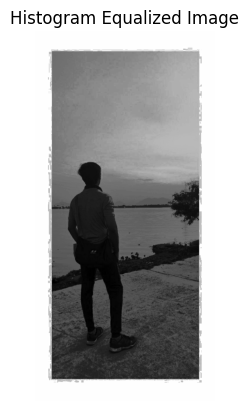

In [ ]:
# Convert image to grayscale if it's not already
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()



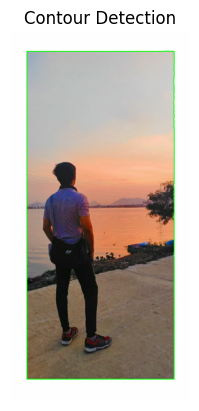

In [ ]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.axis('off')
plt.show()


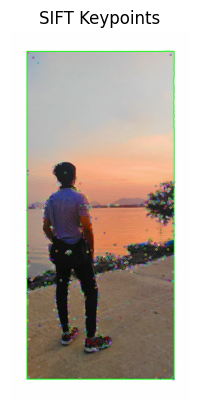

In [ ]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()



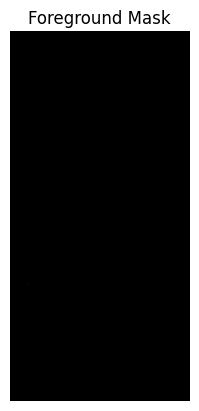

In [ ]:
# Create background subtractor object
background_subtractor = cv2.createBackgroundSubtractorMOG2()
# Apply background subtraction
fg_mask = background_subtractor.apply(image)
plt.imshow(fg_mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.show()


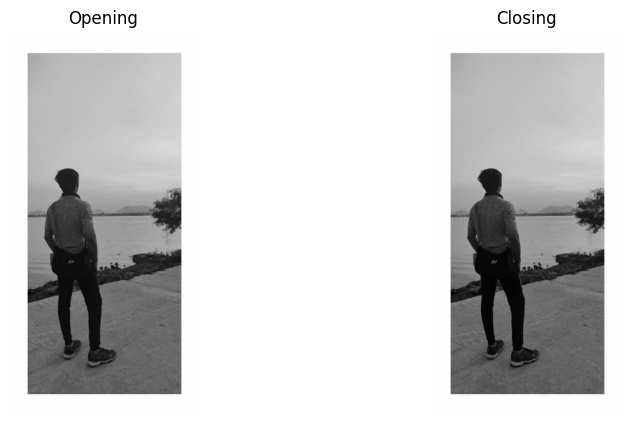

In [ ]:
# Convert kernel to uint8 datatype
kernel = np.uint8(kernel)

# Apply opening (erosion followed by dilation)
opening = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

# Apply closing (dilation followed by erosion)
closing = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(opening, cmap='gray')
plt.title('Opening'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(closing, cmap='gray')
plt.title('Closing'), plt.axis('off')
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

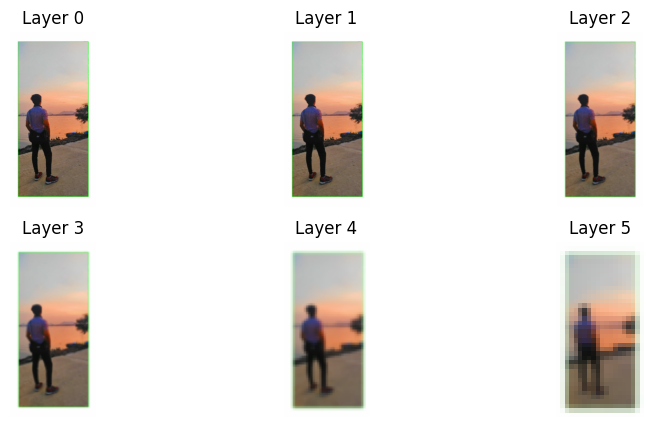

In [ ]:
# Construct Gaussian pyramid
layer = image.copy()
gaussian_pyramid = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)

# Display Gaussian pyramid
plt.figure(figsize=(10, 5))
for i, layer in enumerate(gaussian_pyramid):
    plt.subplot(2, 3, i + 1), plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB))
    plt.title(f'Layer {i}'), plt.axis('off')
plt.show()

# Construct Laplacian pyramid
layer = gaussian_pyramid[5]
laplacian_pyramid = [layer]
for i in range(5, 0, -1):
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
    expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i - 1], expanded)
    laplacian_pyramid.append(laplacian)


num_layers = len(gaussian_pyramid)
num_cols = 3  # Adjust this value based on how many columns you want in the subplot grid
num_rows = (num_layers - 1) // num_cols + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, layer in enumerate(gaussian_pyramid):
    plt.subplot(num_rows, num_cols, i + 1), plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB))
    plt.title(f'Layer {i}'), plt.axis('off')
plt.show()





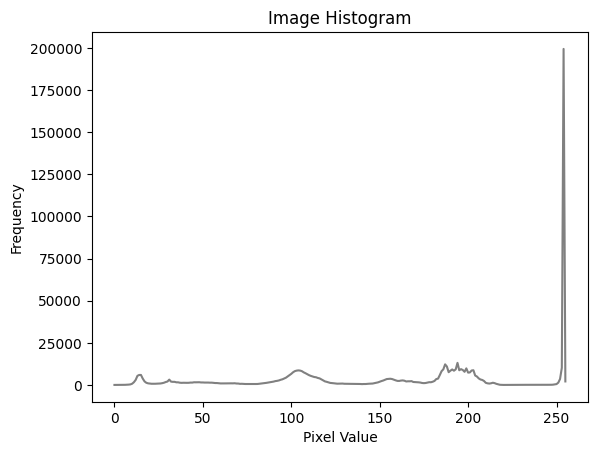

In [ ]:
# Compute histogram
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histogram
plt.plot(hist, color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()


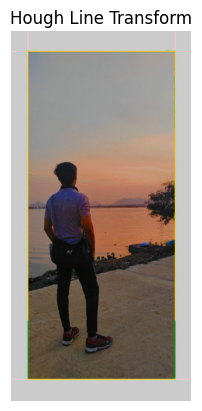

In [ ]:
# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# Draw detected lines on the image
line_image = np.zeros_like(image)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Overlay lines on original image
line_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Transform')
plt.axis('off')
plt.show()


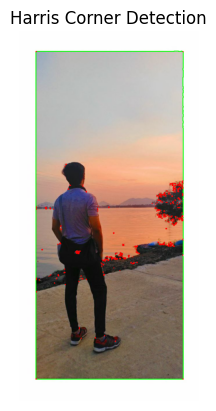

In [ ]:
# Detect corners using Harris corner detection
dst = cv2.cornerHarris(gray_image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
image[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


In [ ]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mar



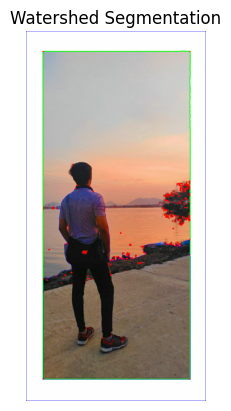

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark boundaries in blue

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()




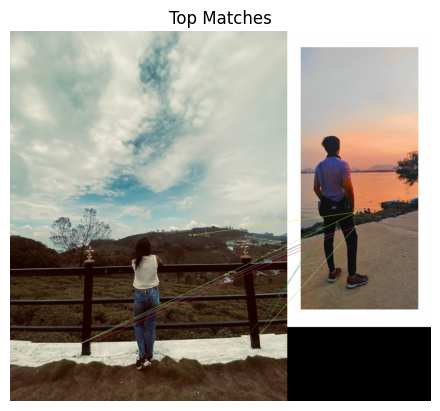

In [ ]:
# Load sample images
image1 = cv2.imread(cv2.samples.findFile("/content/WhatsApp Image 2024-05-27 at 14.14.29_3c411988.jpg"))
image2 = cv2.imread(cv2.samples.findFile('/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg'))

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB (or any other feature detector and descriptor extractor)
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Match descriptors using a brute-force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Top Matches')
plt.axis('off')
plt.show()




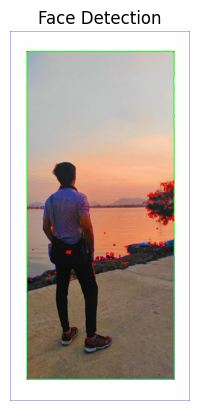

In [ ]:
# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Face Detection')
plt.axis('off')
plt.show()


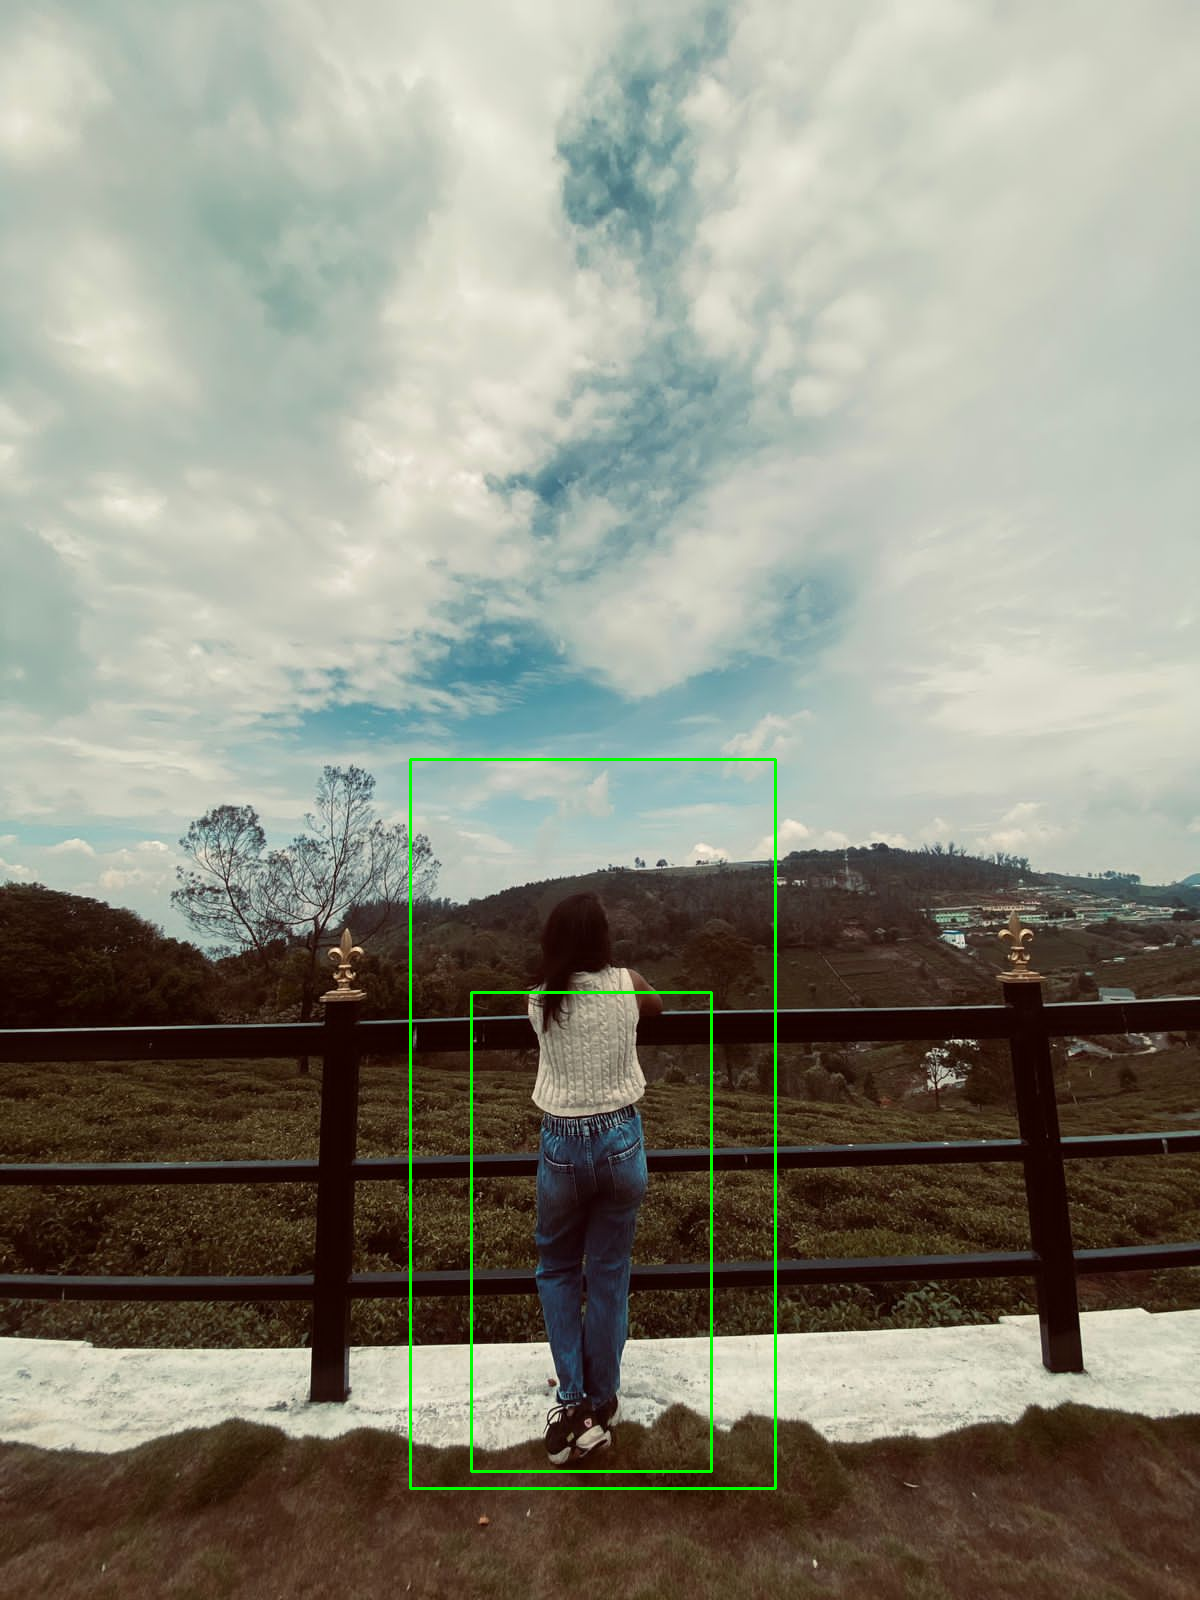

In [ ]:
from google.colab.patches import cv2_imshow

# Display the result
cv2_imshow(result_image)

In [ ]:
import cv2

# Load the HOG detector for pedestrian detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Function to detect persons in the image
def detect_persons(image):
    # Detect persons in the image
    found, _ = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

    return found

# Function to calculate center point of a bounding box
def calculate_center(box):
    x, y, w, h = box
    return (x + w // 2, y + h // 2)

# Function to bring two persons together
def bring_persons_together(image1, image2):
    # Detect persons in the images
    boxes1 = detect_persons(image1)
    boxes2 = detect_persons(image2)

    # Calculate center points of the bounding boxes
    if len(boxes1) != 1 or len(boxes2) != 1:
        print("Exactly one person is needed in each image for this operation.")
        return None

    center1 = calculate_center(boxes1[0])
    center2 = calculate_center(boxes2[0])

    # Calculate the offset needed to move one person towards the other
    offset_x = center2[0] - center1[0]
    offset_y = center2[1] - center1[1]

    # Move one person towards the other
    for box in boxes1:
        box[0] += offset_x
        box[1] += offset_y

    return boxes1

# Read the input images
image1 = cv2.imread('/content/WhatsApp Image 2024-05-27 at 14.14.29_3c411988.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg')

# Bring persons together in image1
adjusted_boxes = bring_persons_together(image1, image2)

# Draw bounding box around the adjusted person
if adjusted_boxes:
    for box in adjusted_boxes:
        x, y, w, h = box
        cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Merge the images
    merged_image = cv2.hconcat([image1, image2])

    # Display the result
    cv2.imshow('Merged Image', merged_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Could not bring persons together.")


Exactly one person is needed in each image for this operation.
Could not bring persons together.


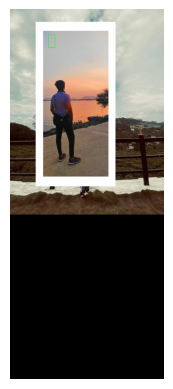

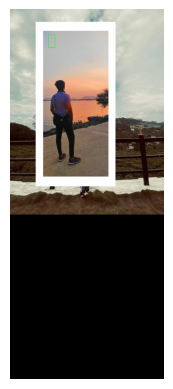

In [ ]:
import cv2

# Function to bring two persons together
def bring_persons_together(image1, image2, box1, box2):
    # Calculate the offset needed to align the first person's bounding box with the second person's bounding box
    offset_x = box2[0] - box1[0]
    offset_y = box2[1] - box1[1]

    # Move the first person towards the second person in the first image
    adjusted_box1 = [box1[0] + offset_x, box1[1] + offset_y, box1[2], box1[3]]

    # Create a blank canvas to merge the images
    max_width = max(image1.shape[1], image2.shape[1])
    total_height = image1.shape[0] + image2.shape[0]
    merged_image = np.zeros((total_height, max_width, 3), dtype=np.uint8)

    # Place the first image in the merged image
    merged_image[:image1.shape[0], :image1.shape[1]] = image1

    # Place the second image in the merged image, adjusted by the calculated offset
    merged_image[offset_y:image2.shape[0] + offset_y, offset_x:image2.shape[1] + offset_x] = image2

    # Return the adjusted bounding box for the first person in the first image
    return adjusted_box1, merged_image

# Read the input images
image1 = cv2.imread('/content/WhatsApp Image 2024-05-27 at 14.14.29_3c411988.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg')

# Define bounding boxes for two persons in their respective images (format: [x, y, width, height])
box1 = [100, 100, 50, 100]  # Example box for person 1 in image 1
box2 = [300, 200, 60, 110]  # Example box for person 2 in image 2

# Bring persons together in image 1
adjusted_box1, merged_image = bring_persons_together(image1, image2, box1, box2)

# Draw bounding box around the adjusted person in image 1
cv2.rectangle(merged_image, (adjusted_box1[0], adjusted_box1[1]), (adjusted_box1[0] + adjusted_box1[2], adjusted_box1[1] + adjusted_box1[3]), (0, 255, 0), 2)

import matplotlib.pyplot as plt

# Display the merged image
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
import cv2

# Replace 'image1.jpg' and 'image2.jpg' with your actual image paths
image1 = cv2.imread('/content/WhatsApp Image 2024-05-27 at 14.14.29_3c411988.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg')

# Check if both images are loaded successfully
if image1 is None or image2 is None:
    print("Error: Could not read images")
    exit()

# Get the height (rows) of the images (assuming they have the same height)
height = image1.shape[0]

# Check if images have the same width. If not, resize them to the larger width.
width1, _ = image1.shape[1:]
width2, _ = image2.shape[1:]
max_width = max(width1, width2)
if width1 != max_width:
    image1 = cv2.resize(image1, (max_width, height))
if width2 != max_width:
    image2 = cv2.resize(image2, (max_width, height))

# Horizontally concatenate (stack) the images side-by-side using cv2.hconcat()
combined_image = cv2.hconcat([image1, image2])

# Display the combined image
cv2.imshow('People Collage', combined_image)
cv2.waitKey(0)  # Press any key to close the window
cv2.destroyAllWindows()


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

# Replace 'image1.jpg' and 'image2.jpg' with your actual image paths

image1 = cv2.imread('/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg')
image2 = cv2.imread('/content/WhatsApp Image 2024-05-27 at 14.14.29_3c411988.jpg')

# Check if both images are loaded successfully
if image1 is None or image2 is None:
    print("Error: Could not read images")
    exit()

# Get the height (rows) of the images (assuming they have the same height)
height = image1.shape[0]

# Check if images have the same width. If not, resize them to the larger width.
width1, _ = image1.shape[1:]
width2, _ = image2.shape[1:]
max_width = max(width1, width2)
if width1 != max_width:
    image1 = cv2.resize(image1, (max_width, height))
if width2 != max_width:
    image2 = cv2.resize(image2, (max_width, height))

# Horizontally concatenate (stack) the images side-by-side using cv2.hconcat()
combined_image = cv2.hconcat([image1, image2])

# Choose a display method based on your preference:

# Option 1: Using OpenCV's cv2_imshow (works within Colab's environment)
from google.colab.patches import cv2_imshow
cv2_imshow(combined_image)  # Only pass the image

# Option 2: Using IPython.display.display (simple display)
display(combined_image)

# Option 3: Using Matplotlib (more control over appearance)
plt.imshow(combined_image)
plt.axis('off')  # Hide axes for cleaner presentation
plt.show()


error: OpenCV(4.8.0) /io/opencv/modules/core/src/matrix_operations.cpp:65: error: (-215:Assertion failed) src[i].dims <= 2 && src[i].rows == src[0].rows && src[i].type() == src[0].type() in function 'hconcat'


In [ ]:
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

# Replace 'image1.jpg' and 'image2.jpg' with your actual image paths
image1 = cv2.imread('/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg')
image2 = cv2.imread('/content/WhatsApp Image 2024-05-27 at 14.14.29_3c411988.jpg')

# Check if both images are loaded successfully
if image1 is None or image2 is None:
    print("Error: Could not read images")
    exit()

# Check for matching number of channels
if image1.ndim != image2.ndim:
    print("Error: Images must have the same number of channels")
    exit()

# Get image heights
height1 = image1.shape[0]
height2 = image2.shape[0]

# Resize images if heights differ (assuming you want to combine them anyway)
if height1 != height2:
    max_height = max(height1, height2)
    if height1 < max_height:
        image1 = cv2.resize(image1, (image1.shape[1], max_height))
    else:
        image2 = cv2.resize(image2, (image2.shape[1], max_height))

# Horizontally concatenate images
combined_image = cv2.hconcat([image1, image2])

# Choose a display method based on your preference:
# ... (same display options as before)


Image combination complete!


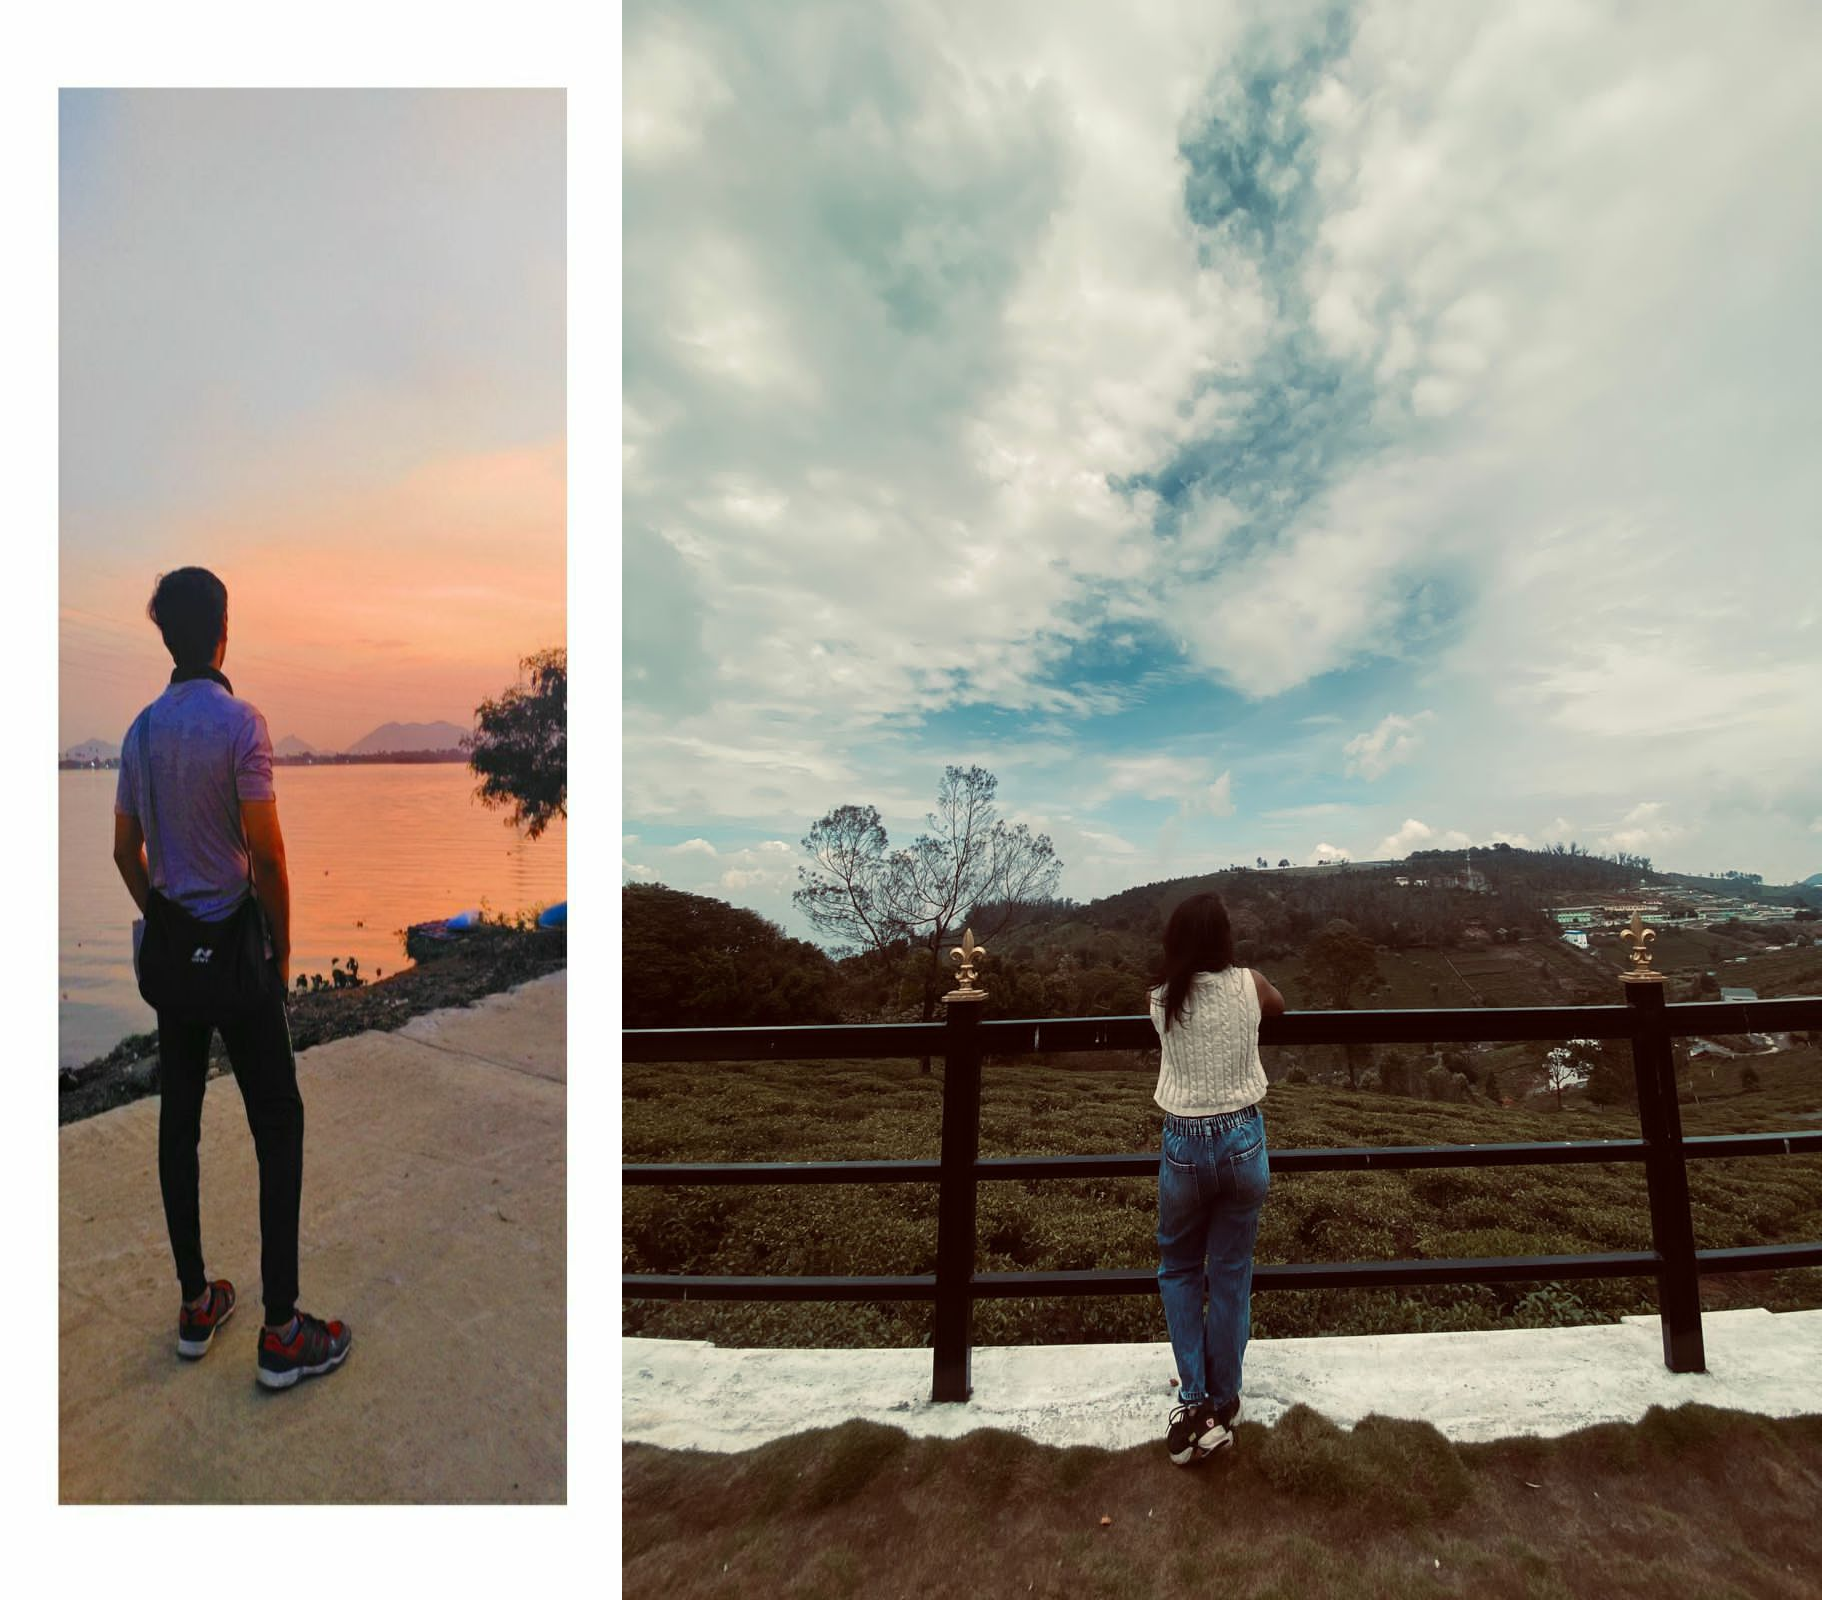

UsageError: Line magic function `%%` not found.


In [ ]:
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

# ... (rest of your code)

# Horizontally concatenate images
combined_image = cv2.hconcat([image1, image2])

# Print confirmation (optional)
print("Image combination complete!")

# Choose a display method based on your preference:
cv2_imshow(combined_image)  # For Colab
# display(combined_image)  # For simple display
# plt.imshow(combined_image); plt.axis('off'); plt.show()  # For Matplotlib

# (Optional cell separator for Colab)
%%


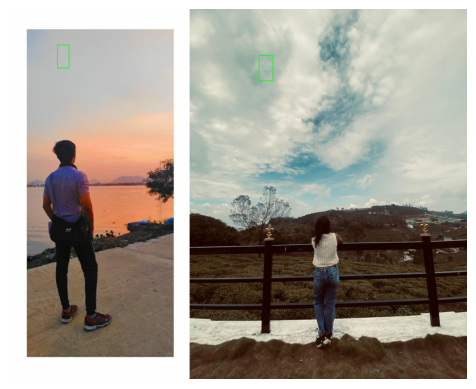

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to resize the image while preserving aspect ratio
def resize_image(image, new_height):
    ratio = new_height / image.shape[0]
    return cv2.resize(image, (int(image.shape[1] * ratio), new_height))

# Function to calculate the offset needed to bring one person closer to the other
def calculate_offset(box1, box2):
    # Calculate center points of the bounding boxes
    center1 = ((box1[0] + box1[2]) // 2, (box1[1] + box1[3]) // 2)
    center2 = ((box2[0] + box2[2]) // 2, (box2[1] + box2[3]) // 2)

    # Calculate the offset needed to move one person towards the other
    offset_x = center2[0] - center1[0]
    offset_y = center2[1] - center1[1]

    return offset_x, offset_y

# Read the input images
image1 = cv2.imread('/content/drive/MyDrive/Untitled folder (1)/photo_2022-10-22_20-30-10.jpg')
image2 = cv2.imread('/content/WhatsApp Image 2024-05-27 at 14.14.29_3c411988.jpg')

# Define bounding boxes for the persons in image1 and image2 (format: [x, y, width, height])
box1 = [100, 100, 50, 100]  # Example box for person in image1
box2 = [300, 200, 60, 110]  # Example box for person in image2

# Calculate the offset needed to bring one person closer to the other
offset_x, offset_y = calculate_offset(box1, box2)

# Move person in image1 towards person in image2
box1[0] += offset_x
box1[1] += offset_y

# Resize images to have the same height
new_height = max(image1.shape[0], image2.shape[0])
image1_resized = resize_image(image1, new_height)
image2_resized = resize_image(image2, new_height)

# Draw bounding boxes around the persons in image1 and image2
cv2.rectangle(image1_resized, (box1[0], box1[1]), (box1[0] + box1[2], box1[1] + box1[3]), (0, 255, 0), 2)
cv2.rectangle(image2_resized, (box2[0], box2[1]), (box2[0] + box2[2], box2[1] + box2[3]), (0, 255, 0), 2)

# Horizontally concatenate (stack) the images side-by-side using numpy.hstack()
combined_image = np.hstack((image1_resized, image2_resized))

# Display the combined image using matplotlib
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Define the file path to the combined image
file_path = 'combined_image.jpg'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    # Load the combined image
    combined_image = cv2.imread(file_path)

    # Check if the image was loaded successfully
    if combined_image is None:
        print("Error: Image not loaded.")
    else:
        # Perform GrabCut segmentation
        mask = np.zeros(combined_image.shape[:2], np.uint8)
        bgd_model = np.zeros((1,65), np.float64)
        fgd_model = np.zeros((1,65), np.float64)
        rect = (50, 50, combined_image.shape[1]-100, combined_image.shape[0]-100)
        cv2.grabCut(combined_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

        # Create a mask where all background and probable background pixels are marked as 0,
        # and all foreground and probable foreground pixels are marked as 1
        mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

        # Multiply the original image with the mask to get the segmented image
        segmented_image = combined_image * mask2[:,:,np.newaxis]

        # Display the segmented image
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
else:
    print("Error: Image file not found.")


Error: Image file not found.
